In [26]:
### https://sgugger.github.io/convolution-in-depth.html
### https://medium.com/towards-data-science/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
import os
import numpy as np
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import SubsetRandomSampler

dataset_url = "http://files.fast.ai/data/examples/cifar10.tgz"
download_url(dataset_url, '.')

with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
data_dir = './data/cifar10'
print(os.listdir(data_dir))
print('')
print(os.listdir(data_dir + '/train'))
print('')
print(os.listdir(data_dir + '/test'))
# dataset with 2 folders train and test, 50,000 and 10,000. Both contain 10 folders one for each class of images.
# ['train', 'test', 'labels.txt']
# ['frog', 'ship', 'bird', 'horse', 'deer', 'airplane', 'truck', 'cat', 'automobile', 'dog']
# ['frog', 'ship', 'bird', 'horse', 'deer', 'airplane', 'truck', 'cat', 'automobile', 'dog']


Using downloaded and verified file: ./cifar10.tgz
['test', 'labels.txt', 'train']

['truck', 'bird', 'airplane', 'automobile', 'deer', 'frog', 'cat', 'horse', 'dog', 'ship']

['truck', 'bird', 'airplane', 'automobile', 'deer', 'frog', 'cat', 'horse', 'dog', 'ship']


In [27]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No of training examples of airplanes:', len(airplane_files))
print(airplane_files[:5])
# No of training examples of airplanes: 5000
# ['35548_airplane.png', '3042_airplane.png', '48424_airplane.png', '37199_airplane.png', '13716_airplane.png']

No of training examples of airplanes: 5000
['43427_airplane.png', '42026_airplane.png', '32573_airplane.png', '24395_airplane.png', '20523_airplane.png']


In [28]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print('No of Test examples of ships:', len(ship_test_files))
print(ship_test_files[:5])
# No of Test examples of ships: 1000
# ['9279_ship.png', '120_ship.png', '7320_ship.png', '8239_ship.png', '7580_ship.png']

No of Test examples of ships: 1000
['344_ship.png', '1007_ship.png', '1897_ship.png', '2921_ship.png', '9440_ship.png']


In [29]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())
img, label = dataset[0]
print(img.shape, label)
img
# torch.Size([3, 32, 32]) 0
# tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
#          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [30]:
print(dataset.classes)
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Label:  airplane (0)


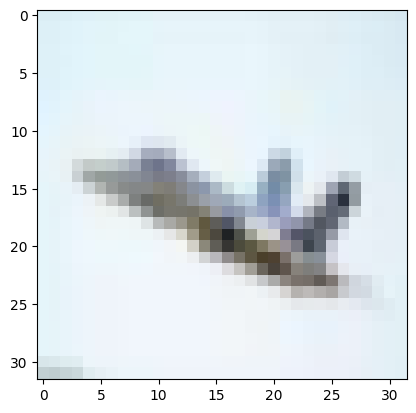

In [31]:
import matplotlib.pyplot as plt
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
show_example(*dataset[0])


In [32]:
# Set aside small part of training set for validation
def split_indices(n, val_pct=0.1, seed=99):
    n_val = int(val_pct * n)
    np.random.seed(seed)
    idxs = np.random.permutation(n) #permutation of 0 to n-1
    return idxs[n_val:], idxs[:n_val]

val_pct = 0.2
rand_seed = 42
train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices), len(val_indices))
print('Sample validation indices: ', val_indices[:10])

40000 10000
Sample validation indices:  [33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


In [33]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size, sampler=val_sampler)

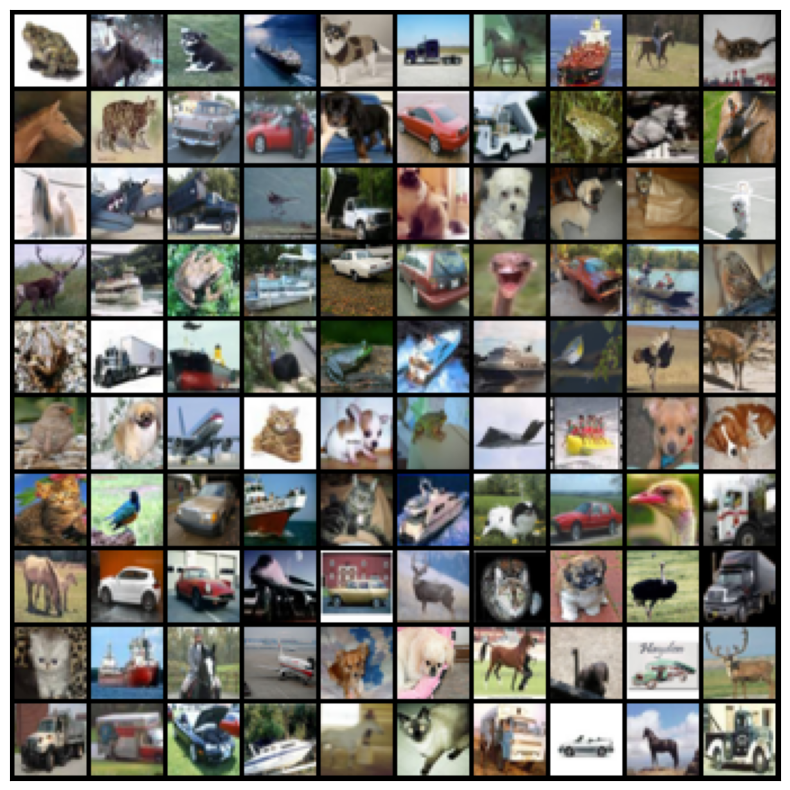

In [34]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, 10).permute(1,2,0))
        break
show_batch(train_dl)

In [35]:
#* Fewer parameters: small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much few parameters compared to a fully
# connected layer.
#* Sparsity of connections: in each layer, each output eleent only depends on a small number of input elements, which makes the forward and backward passes more efficient
#* Parameter sharing and spatial invariance: the features learned by a kernel in one part of the image can be used to detect similar
# pattern oin a different part of another image.
#* Max-Pooling layers to progressively decrease the height & width of the output tensors from each convolutional layer.

import torch.nn as nn
import torch.nn.functional as F

simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)
# ?nn.Conv2d
## This for-loop Conv2d layer transforms a 3-channel image to a 16-channel feature map, and the MaxPool2d layer halves the height and width.
## The feature map gets smaller as we add more layers, until we are finally left with a n x 1 x 1 feature map (where n is the # of channels)
## which can be flattened into a vector. Then add a fully connected layer at the end to get a vector size of 10 for each image.

for images, labels in train_dl:
    print('images shape:', images.shape)
    out = simple_model(images)
    print('out shape:', out.shape)
    break

images shape: torch.Size([100, 3, 32, 32])
out shape: torch.Size([100, 8, 16, 16])


In [36]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),
    nn.Linear(16, 10)
)
model[0]
# Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [37]:
model[0].weight.shape
# torch.Size([16, 3, 3, 3])

torch.Size([16, 3, 3, 3])

In [38]:
for images, labels in train_dl:
    print('images shape:', images.shape)
    out = model(images)
    print('out shape:', out.shape)
    print('First 5 out values:', out[0])
    break
# images shape: torch.Size([100, 3, 32, 32])
# out shape: torch.Size([100, 10])
# First 5 out values: tensor([ 0.2259,  0.1524, -0.1209, -0.1956, -0.2121, -0.2089,  0.1665, -0.0717,
#       0.1493, -0.1593], grad_fn=<SelectBackward0>)

images shape: torch.Size([100, 3, 32, 32])
out shape: torch.Size([100, 10])
First 5 out values: tensor([ 0.0805,  0.2467, -0.0322, -0.1766,  0.0130,  0.2390, -0.2037,  0.0036,
        -0.0502, -0.0515], grad_fn=<SelectBackward0>)


In [39]:
F.softmax(out[0], dim=0)
# tensor([0.1270, 0.1180, 0.0898, 0.0833, 0.0819, 0.0822, 0.1196, 0.0943, 0.1176,
#         0.0864], grad_fn=<SoftmaxBackward0>)

tensor([0.1065, 0.1258, 0.0952, 0.0824, 0.0996, 0.1248, 0.0802, 0.0987, 0.0935,
        0.0934], grad_fn=<SoftmaxBackward0>)

In [40]:
probs = F.softmax(out[0], dim=0)
torch.sum(probs), probs
# (tensor(1., grad_fn=<SumBackward0>),
#  tensor([0.1270, 0.1180, 0.0898, 0.0833, 0.0819, 0.0822, 0.1196, 0.0943, 0.1176,
        #  0.0864], grad_fn=<SoftmaxBackward0>))

(tensor(1., grad_fn=<SumBackward0>),
 tensor([0.1065, 0.1258, 0.0952, 0.0824, 0.0996, 0.1248, 0.0802, 0.0987, 0.0935,
         0.0934], grad_fn=<SoftmaxBackward0>))

In [41]:
probs = F.softmax(out[0], dim=0)
torch.max(probs)
# tensor(0.1270, grad_fn=<MaxBackward1>)

tensor(0.1258, grad_fn=<MaxBackward1>)

In [42]:
dataset.classes[9]

'truck'

In [43]:
probs = F.softmax(out[0], dim=0)
dataset.classes[labels[0]]

'cat'

Label:  cat (tensor(3))


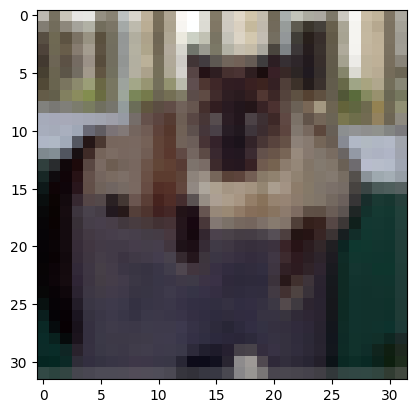

In [44]:
probs = F.softmax(out[0], dim=0)
show_example(images[0], labels[0])

In [45]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device


    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [46]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(train_dl, device)
to_device(model, device);

In [47]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result

def evaluate(model, loss_func, valid_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, xb, yb, metric=metric) for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [48]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, opt_fn=None, lr=None, metric=None):
  train_losses, val_losses, val_metrics = [], [], []
  if opt_fn is None: opt_fn = torch.optim.SGD #instantiate the optimizer
  opt = opt_fn(model.parameters(), lr=lr)
  for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
      train_loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

    model.eval()
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)

    if metric is None:
      print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch+1, epochs, train_loss, val_loss))
    else:
      print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, train_loss, val_loss, metric.__name__, val_metric))
  return train_losses, val_losses, val_metrics

In [49]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [50]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))
#Loss: 2.3132, Accuracy: 0.0992  ~10% accuracy due to randomly initialized model

Loss: 2.3132, Accuracy: 0.0992


In [52]:
num_epochs = 10
opt_fn = torch.optim.Adam
lr = 0.005
history = fit(num_epochs, model, F.cross_entropy, train_dl, valid_dl, opt_fn, lr,  accuracy)
train_losses, val_losses, val_metrics = history
# ...
# Epoch [9/10], train_loss: 1.0943, val_loss: 1.1183, accuracy: 0.6007
# Epoch [10/10], train_loss: 1.0599, val_loss: 1.0766, accuracy: 0.6095

Epoch [1/10], train_loss: 1.0905, val_loss: 1.0442, accuracy: 0.6223
Epoch [2/10], train_loss: 1.0309, val_loss: 1.0730, accuracy: 0.6163
Epoch [3/10], train_loss: 0.9758, val_loss: 1.0463, accuracy: 0.6194
Epoch [4/10], train_loss: 1.0511, val_loss: 1.0338, accuracy: 0.6282
Epoch [5/10], train_loss: 0.9956, val_loss: 0.9826, accuracy: 0.6488
Epoch [6/10], train_loss: 1.0266, val_loss: 1.0926, accuracy: 0.6099
Epoch [7/10], train_loss: 1.1867, val_loss: 0.9820, accuracy: 0.6503
Epoch [8/10], train_loss: 1.2508, val_loss: 1.0310, accuracy: 0.6298
Epoch [9/10], train_loss: 0.8773, val_loss: 0.9544, accuracy: 0.6589
Epoch [10/10], train_loss: 0.8992, val_loss: 1.0020, accuracy: 0.6411


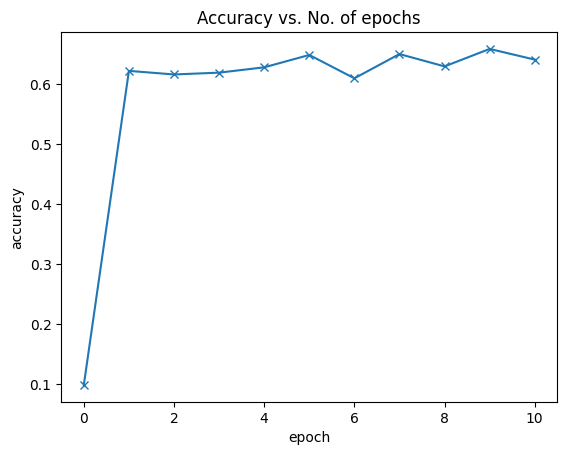

In [55]:
def plot_metric(metric_values):
    plt.plot(metric_values, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_metric([val_acc] + val_metrics)

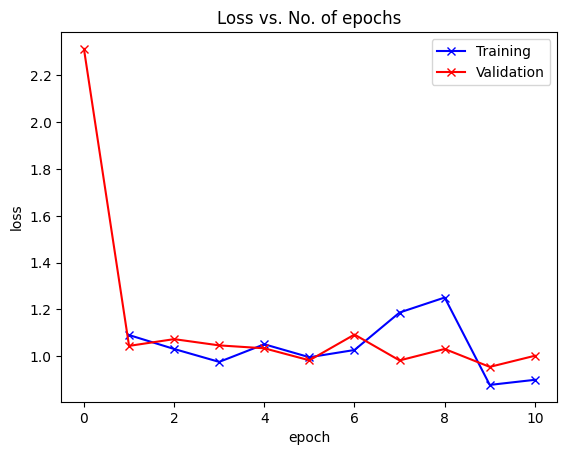

In [58]:

def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses([None]+train_losses, [val_loss]+val_losses)